In [8]:
import cv2

import scipy as sci
import os
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import kurtosis,skew,stats
import cv2
from numpy import savetxt
import matplotlib.pyplot as plt
from numpy import loadtxt
import glob
from sklearn.feature_extraction import image
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sci
import os

from IPython.display import Image






/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant2/y20m12d14
/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant2/y20m12d15
/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant2/y20m12d16
/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant2/y20m12d17
/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant2/y20m12d18
/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant2/y20m12d19
/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant2/y20m12d20
/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant2/y20m12d21
/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant2/y20m12d22
/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial008/Patches/Plant3/y20m12d14


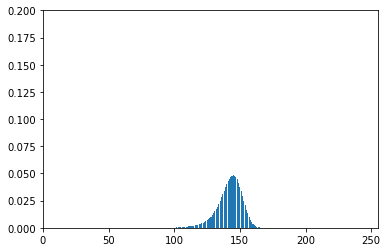

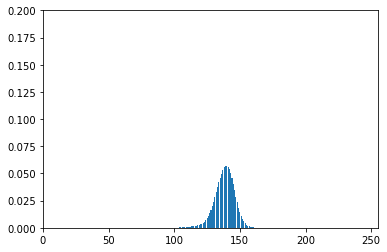

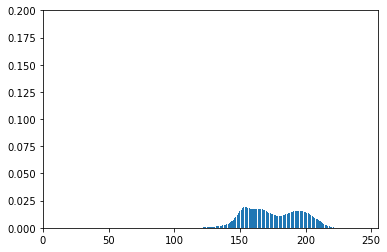

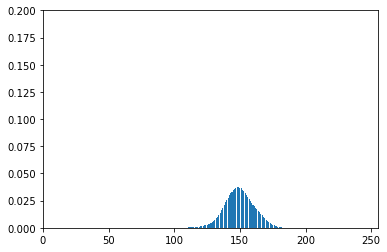

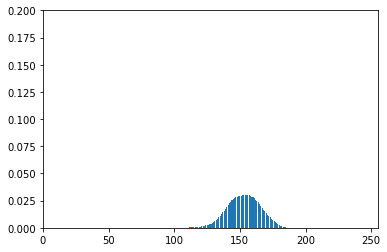

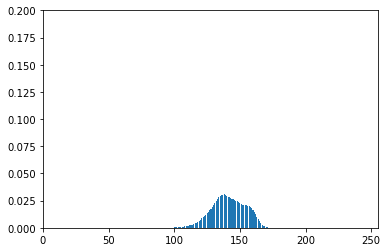

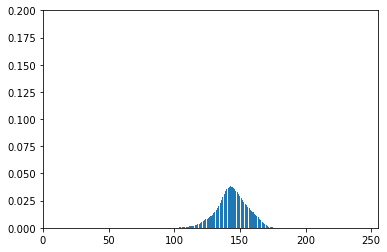

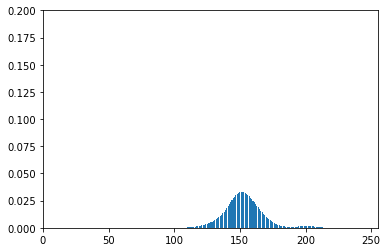

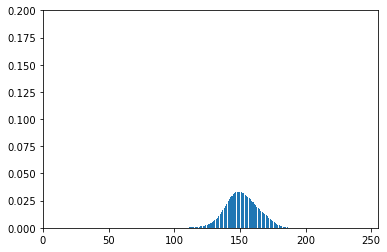

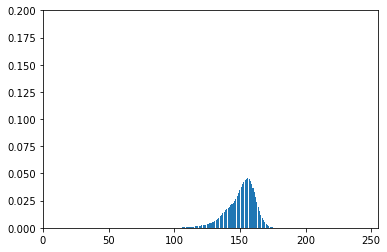

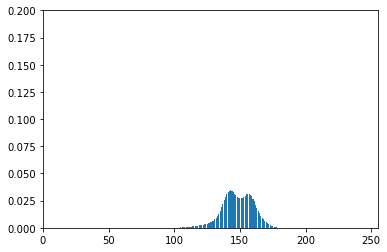

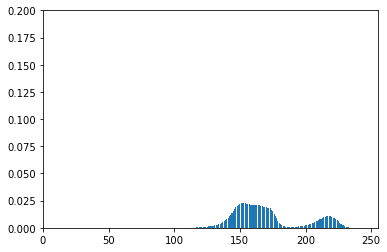

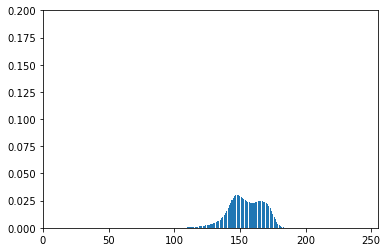

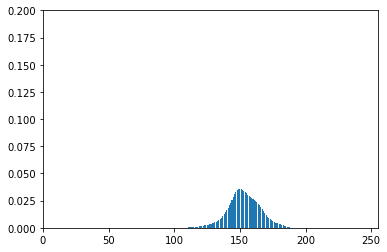

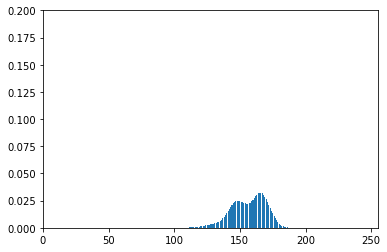

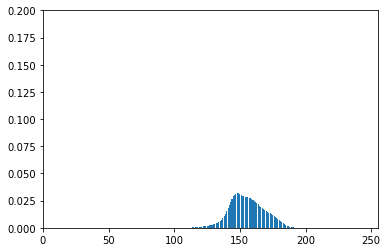

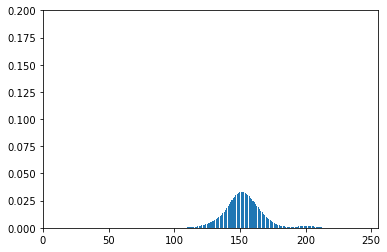

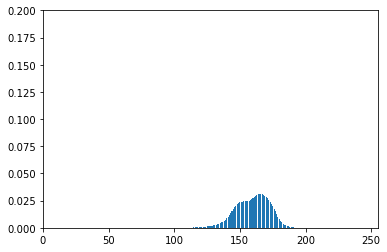

In [9]:

# Last 3 digits of trial number
trial_num = '008'
# Filer address, where all data is located
root = r'/mnt/research-projects/e/ejlobato/assist1data/cyber_plant/SideCam/Trial'+ str(trial_num) + '/Patches'
#Dates = ['y20m09d26','y20m09d27','y20m09d28','y20m09d29','y20m09d30','y20m10d01','y20m10d02','y20m10d03','y20m10d04','y20m10d05','y20m10d06','y20m10d07','y20m10d08','y20m10d09','y20m10d10','y20m10d11','y20m10d12','y20m10d13']
Dates = ['y20m12d14','y20m12d15','y20m12d16','y20m12d17','y20m12d18','y20m12d19','y20m12d20','y20m12d21','y20m12d22']
Scan = '1'
Type='YEL'
# Plant ID
Plants = ['Plant2','Plant3']
for plant in Plants:
    for day in Dates:
        directory = os.path.join(root, plant, day)
        print(directory)
        mean = []
        skewness = []
        kurtos = []
        mode = []
        mode_location = []
        standard_deviation = []
        mask_ravel_for_stats1 = []
        mask_ravel = 0
        mask_ravel_stats = 0
        nothing =  False
        # Go through all pictures under given plant and compute histogram for that plant
        for (dirname, dirs, files) in os.walk(directory):
            if isinstance(dirname, str):
                if (dirname.split(os.sep)[-2] == '1') and 'YEL_NEW' in dirname:    #For Scan 1 and YEL/STEM
                    nothing = False
                    for filename in glob.glob(os.path.join(dirname, '*.*')):
                        if 'Thumbs' in filename:
                            print("File is Corrupted")
                        else:
                            im1 = cv2.imread(filename)
                            #print("Reading:",filename.split(os.sep)[-1])
                            if im1.sum() < 1:
                                nothing = True
                                continue
                            nothing =  False
                            nir = im1[:,:,2]
                            mask=nir
                            #plt.imshow(nir)
                            #hsv = cv2.cvtColor(im1,cv2.COLOR_BGR2HSV)
                            #lab = cv2.cvtColor(im1,cv2.COLOR_BGR2LAB)
                            #sat = hsv[:,:,1]
                    
                            #ret2,th2 = cv2.threshold(sat,135,255,cv2.THRESH_BINARY)
                            #mask = cv2.bitwise_and(im1[:,:,2],th2)
                            #plt.imshow(mask)
                            window_width=500
                            window_height=616
                            mask[mask < 100] = 0
                            mask_ravel = np.ravel(mask)
                            mask_ravel_stats = mask_ravel[mask_ravel != 0]
                            mask_ravel_for_stats1.extend(mask_ravel_stats)
                        if nothing:
                            # Arbitrary array of zeros
                            mask_ravel_for_stats1.extend(np.ravel(np.zeros((10, 10))))
        plt.figure()            
        plt.xlim([0,255])                                                               
        plt.ylim([0,0.2])
        hists_plant1,x = np.histogram(mask_ravel_for_stats1,bins = [i for i in range(257)],density = True)
        plt.bar(range(256),hists_plant1)


        mean = np.mean(mask_ravel_for_stats1)                                     # mean of histograms
        #print(mean)

        skewness = skew(hists_plant1)                                                   # skewness of histograms
        #print(skewness)

        kurtos = kurtosis(hists_plant1)                                                 # kurtosis of histograms
        #print(kurtos)

        standard_deviation = np.std(mask_ravel_for_stats1)                        # standard deviation of histograms
        #print(standard_deviation)

        mode = np.argmax(hists_plant1)                                                  # index having the maximum value in histogram
        #print(mode)

        src_dir='/home/sbaner24/Maize/Output/NIR_Histograms/Trial'
        savetxt(src_dir+str(trial_num)+'/'+str(Type)+'/'+str(plant)+'/'+str(day)+'.csv', hists_plant1)                  # file name to save one histogram of all images per session
        with open(src_dir+str(trial_num)+'/'+str(Type)+'/'+str(plant)+'/'+str(day)+".txt","w") as f:
            f.write("Mean="+str(mean)+'\n'+"skewness="+str(skewness)+'\n'+"kurtosis="+str(kurtos)+'\n'+"standard_deviation="+str(standard_deviation)+'\n'+"mode="+str(mode))
